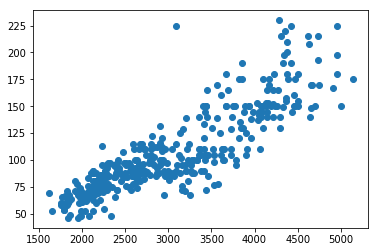

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Get Dataset

df = pd.read_excel('proj1Dataset.xlsx')  #read into dataframe
df.head()

x = np.array(df['Weight'])        #Predictor array
t = np.array(df['Horsepower'])    #Target array

emptyidx = np.argwhere(np.isnan(t))  #Clean up data
t = t[~np.isnan(t)]
x = np.delete(x, emptyidx)

x = np.reshape(x, (len(x),1))
t = np.reshape(t,(len(t),1))

# Normalize and Plot Data
x2 = x/np.mean(x)
plt.scatter(x,t)

In [2]:
# Create Design Matrix

X = np.ones((len(x),1))
X = np.mat(np.hstack((x,X)))
T = np.mat(t)

# Closed Form Solution
    
weights = np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,T))
y = np.dot(X,weights)

    

[[  0.03955133]
 [-13.04012986]]


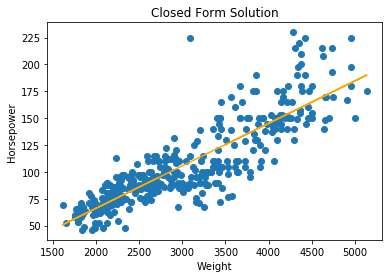

In [3]:
# Plot Closed Form Solution
print(weights)
plt.figure(1)
plt.scatter(x,t)
x3 = np.linspace(1500,5500,500)
plt.plot(x,y,color = 'orange')
plt.title("Closed Form Solution")
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.show()

In [10]:
#Gradient Descent Solution
x2 = x2
t2 = t

In [11]:
def guess(w,x):
    return w[0] + w[1]*x

In [16]:
def cost(X,T,w):
    total_error = 0
    n = len(X)
    
    for i in range(n):
        total_error += (T[i] - guess(w,X[i]))**2
    
    return 0.5*total_error

In [17]:
def gradient(T,X,w):
    grad = np.array([0.0,0.0])
    n = len(X)
    for i in range(n):
        grad[0] += -1*(T[i] - guess(w,X[i]))
        grad[1] += -1*(T[i] - guess(w,X[i]))*X[i]        
    return grad

In [20]:
def gradientDescent(X,T,rho,epochs):
    grad = np.array([0.0,0.0])
    w = np.array([1.0,0.0])
    e = []
    
    for i in range(epochs):
        grad = gradient(T,X,w)
        ce = cost(X,T,w)
        print(ce)
        w[0] = w[0] - rho*grad[0]
        w[1] = w[1] - rho*grad[1]
        e.append(ce)
        
    return w,e

In [19]:
w,e = gradientDescent(x2,t2,rho=0.1,epochs=100)
print(w[0],w[1])

[2508318.5]
[1.54001688e+10]
[1.00159628e+14]
[6.51422349e+17]
[4.23674774e+21]
[2.75551361e+25]
[1.79214239e+29]
[1.16558102e+33]
[7.58075425e+36]
[4.93040245e+40]
[3.20665564e+44]
[2.08555802e+48]
[1.35641389e+52]
[8.82190104e+55]
[5.73762466e+59]
[3.73166017e+63]
[2.42701265e+67]
[1.57849057e+71]
[1.02662526e+75]
[6.67700803e+78]
[4.34262023e+82]
[2.82437139e+86]
[1.8369264e+90]
[1.19470783e+94]
[7.77019043e+97]
[5.05360874e+101]
[3.28678706e+105]
[2.13767423e+109]
[1.39030945e+113]
[9.04235236e+116]
[5.88100271e+120]
[3.82491098e+124]
[2.4876615e+128]
[1.61793562e+132]
[1.0522797e+136]
[6.84386041e+139]
[4.45113838e+143]
[2.89494988e+147]
[1.88282953e+151]
[1.2245625e+155]
[7.96436045e+158]
[5.17989385e+162]
[3.36892089e+166]
[2.19109277e+170]
[1.42505202e+174]
[9.26831255e+177]
[6.02796363e+181]
[3.92049204e+185]
[2.54982591e+189]
[1.65836637e+193]
[1.07857521e+197]
[7.01488228e+200]
[4.56236829e+204]
[2.96729205e+208]
[1.92987974e+212]
[1.2551632e+216]
[8.1633826e+219]
[5.3093347

C:\Users\Buster\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


In [ ]:
|